In [1]:
## In this notebook we load in pls results and plot results to further characterize LVs
#PLS was run with matlab 2016 @ CIC
import os
import glob
import pandas as pd
import numpy as np

import sys
import pickle
import hdf5storage
import scipy
import scipy.stats

#Read in csv with subject demographics 
df_sorted = pd.read_csv('../../../../raw_data/sheets/06-08-21-McGillData_WH_Exprodo-Report_IncExc_CR_CRmed_cham_CRtopfdemeduc_civetpass_slopes_ph5_11_time.age_sorted.csv')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_sorted

,oxmg_id,bet_qc..0.5.fair..0.bad..blank..good.,Motion_qc,T1_comments_SS,General_comments,FinalVerdict_SSProject_Include.Exclude,SS_IncExc,motion_status_rai,final_status_SS_RP,OX.MRI,...,intercept_mem,time_since_ph5_mem,intercept_ah4,time_since_ph5_ah4,intercept_ahverb,time_since_ph5_ahverb,intercept_ahnum,time_since_ph5_ahnum,intercept_mh,time_since_ph5_mh
0,1191,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,9.789979,-0.051168,42.498363,-0.087191,22.006846,-0.049583,20.578198,-0.033296,26.730232,0.061428
1,1181,NaN,NaN,NaN,NaN,NaN,Include,exclude,exclude,Yes,...,7.115083,0.013951,55.660254,-0.059103,27.359544,-0.035098,28.272928,-0.026586,29.666825,0.118945
2,1066,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,6.714147,-0.029722,43.731154,-0.121389,22.444647,-0.061605,21.415565,-0.061981,26.369999,0.047480
3,1407,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,7.900504,-0.028188,56.042034,-0.013358,28.461530,-0.009981,27.472120,0.000591,25.954337,0.006191
4,1300,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,8.839265,-0.069781,59.558628,-0.073628,29.910066,-0.018395,29.658761,-0.070147,30.714834,0.046359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1124,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,7.616041,0.005532,39.632058,-0.095118,22.314921,-0.061947,17.309100,-0.016044,26.122202,0.011181
394,2888,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,7.507730,0.000950,56.070592,-0.103792,26.759301,-0.048867,29.403841,-0.069174,27.550845,0.138864
395,1502,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,6.845785,-0.061457,48.921197,0.007255,24.058068,-0.009762,24.828919,0.026340,27.727766,0.088584
396,1224,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,8.325712,-0.022981,62.414763,0.012598,30.752475,0.010030,31.534364,-0.000690,26.936273,0.097501


In [3]:
age=df_sorted['OX.AGE'].values
print(np.mean(age), np.std(age), np.min(age), np.max(age))
edu=df_sorted['OX.EDUC_ftht'].values
print(np.mean(edu), np.std(edu), np.min(edu), np.max(edu))
sex=df_sorted['OX.SEX'].values
print(np.shape(np.where(sex=='Female')))
scanner=df_sorted['prisma_bool'].values
print(np.shape(np.where(scanner==0)))

69.52021809045227 4.897962355736868 60.5585 82.7625
15.842349246231153 3.537355028708965 6.0 31.5
(1, 92)
(1, 281)


In [4]:
#load in an lv, set behavs and components text once, will be same for all
## each lv .mat file saves the usc and vsc, so no need to load each

fname = "lv_one.mat"
pls_res = hdf5storage.loadmat(fname)
components_list = []
for idx in range(0,len(pls_res['components'].tolist()[0])):
    components_list.append( str(pls_res['components'].tolist()[0][idx][0]) )

    behavs_list = []
for idx in range(0,len(pls_res['behavs_text'].tolist()[0])):
    behavs_list.append( str(pls_res['behavs_text'].tolist()[0][idx][0]) )

In [5]:
pls_res['pct_cov']

array([[5.6892872e-01, 1.9656801e-01, 6.4886041e-02, 4.8698787e-02,
        4.0480342e-02, 2.6728751e-02, 1.6447697e-02, 1.3681915e-02,
        1.1510716e-02, 7.7458085e-03, 2.8316446e-03, 1.4904472e-03,
        9.7711199e-07, 4.4449589e-08]], dtype=float32)

In [6]:
fname = "lv_one.mat"
lv_one = hdf5storage.loadmat(fname)
fname = "lv_two.mat"
lv_two = hdf5storage.loadmat(fname)

print("LV1, 99%")
for idx,bsr in enumerate(lv_one['bsr'][0]):
    if(np.abs(bsr) >= 2.58):
        print(components_list[idx])
print(" ")
print("LV1, 95%")
for idx,bsr in enumerate(lv_one['bsr'][0]):
    if(np.abs(bsr) >= 1.96):
        print(components_list[idx])
print(" ")
print("LV2, 99%")
for idx,bsr in enumerate(lv_two['bsr'][0]):
    if(np.abs(bsr) >= 2.58):
        print(components_list[idx])
print(" ")
print("LV2, 95%")
for idx,bsr in enumerate(lv_two['bsr'][0]):
    if(np.abs(bsr) >= 1.96):
        print(components_list[idx])
#sig_bsr = np.where(lv_one['bsr'][0] > 2)
#sig_bsr
#components_list[sig_bsr.tolist()]

LV1, 99%
Comp1_SA
Comp7_CT
Comp10_FA
 
LV1, 95%
Comp1_SA
Comp1_FA
Comp3_FA
Comp7_CT
Comp7_SA
Comp9_FA
Comp10_SA
Comp10_MD
Comp10_FA
Comp10_RD
 
LV2, 99%
Comp6_FA
Comp7_SA
Comp7_FA
Comp7_RD
Comp9_SA
 
LV2, 95%
Comp2_RD
Comp5_MD
Comp6_SA
Comp6_MD
Comp6_FA
Comp6_RD
Comp7_SA
Comp7_MD
Comp7_FA
Comp7_RD
Comp9_SA
Comp10_CT
Comp10_RD


In [7]:
#Get correlations and 95% CI for each behav measures
print(lv_two['lvcorrs'])
print(lv_two['lower'])
print(lv_two['upper'])

[[-0.07797802  0.13312055 -0.12389802  0.14806218 -0.14733215  0.00854023
   0.04305936  0.13657838  0.02553486  0.10436795  0.05402993  0.13339005
   0.02175565  0.0753521 ]]
[[0.11313343 0.05963226 0.11061133 0.05948228 0.09429431 0.08743907
  0.08788247 0.05370878 0.0862025  0.06305026 0.09012809 0.04760277
  0.09446745 0.09335624]]
[[0.06715298 0.10902682 0.06828298 0.1072709  0.06363462 0.11391255
  0.09476611 0.11806098 0.09665255 0.11082904 0.09265548 0.11921145
  0.08816543 0.09596664]]


In [8]:
#lvone_lvcorrs=lv_one['lvcorrs'][0].tolist()
#lvone_lower=lv_one['lower'][0].tolist(); lvone_upper=lv_one['lower'][0].tolist()
lvone_lvcorrs=lv_one['lvcorrs'][0]
lvone_lower=lvone_lvcorrs - lv_one['lower'][0]; lvone_upper=lvone_lvcorrs + lv_one['upper'][0]
lvtwo_lvcorrs=lv_two['lvcorrs'][0]
lvtwo_lower=lvtwo_lvcorrs - lv_two['lower'][0]; lvtwo_upper=lvtwo_lvcorrs + lv_two['upper'][0]

lvcorrs_dict={'Cog':behavs_list,'LV1_R':lvone_lvcorrs.tolist(), 'LV1_lower':lvone_lower.tolist(),
             'LV1_upper':lvone_upper.tolist(), 'LV2_R':lvtwo_lvcorrs.tolist(), 'LV2_lower':lvtwo_lower.tolist(),
             'LV2_upper':lvtwo_upper.tolist()}

pd.DataFrame(lvcorrs_dict)

,Cog,LV1_R,LV1_lower,LV1_upper,LV2_R,LV2_lower,LV2_upper
0,WordRecall_int,-0.216959,-0.334400,-0.160181,-0.077978,-0.191111,-0.010825
1,WordRecall_slope,0.169273,0.072575,0.271591,0.133121,0.073488,0.242147
2,AnimalRecall_int,-0.242784,-0.363418,-0.195442,-0.123898,-0.234509,-0.055615
3,AnimalRecall_slope,0.249359,0.179845,0.359389,0.148062,0.088580,0.255333
4,Memory_int,-0.158300,-0.283212,-0.080045,-0.147332,-0.241626,-0.083698
5,Memory_slope,0.023163,-0.084013,0.146269,0.008540,-0.078899,0.122453
6,AH4_int,-0.347483,-0.447378,-0.308805,0.043059,-0.044823,0.137825
7,AH4_slope,-0.256007,-0.369559,-0.201240,0.136578,0.082870,0.254639
8,AH4verbal_int,-0.326737,-0.423374,-0.296108,0.025535,-0.060668,0.122187
9,AH4verbal_slope,-0.251714,-0.361514,-0.199662,0.104368,0.041318,0.215197


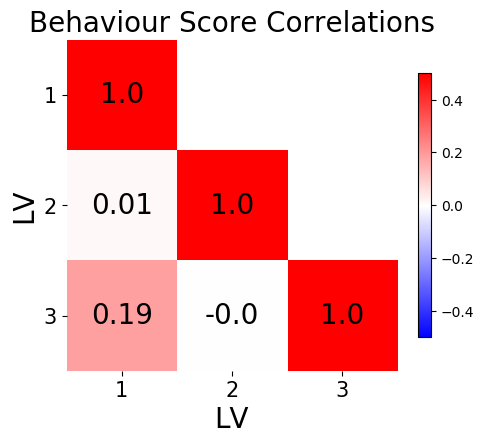

In [9]:
#Plot correlations btwn behav scores for each of the 3 sig LVs
# if you load onto LV1, do you load onto LV2?
vsc_corr = np.corrcoef(np.transpose(pls_res['vsc'][:,0:3])) #only taking first 3 LVs, 3 sig LVs
mask =  np.tri(vsc_corr.shape[0], k=-1) #mask out half of matrix, only need to plot lower triangle
vsc_corr_lower=np.ma.array(vsc_corr, mask=mask).T
np.fill_diagonal(vsc_corr_lower,1)

fig, ax = plt.subplots(figsize=(5,5),dpi=100)
im=ax.imshow(vsc_corr_lower,cmap='bwr',vmin=-0.5,vmax=0.5)
ax.set_xticks(np.arange(3)); ax.set_yticks(np.arange(3))
ax.set_xticklabels(np.arange(1,4),fontsize=15); ax.set_yticklabels(np.arange(1,4),fontsize=15)
ax.set_xlabel('LV',fontsize=20);ax.set_ylabel('LV',fontsize=20)
fig.colorbar(im,ax=ax,shrink=0.6)
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, np.round(vsc_corr_lower[i, j],decimals=2),
                       ha="center", va="center", color="k",fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Behaviour Score Correlations',fontsize=20)
ax.grid(False)
fig.tight_layout()
plt.show()

#for Behav scores, 1 inv corr w 2, 1 mildly corr w 3, 2 inv corr w 3

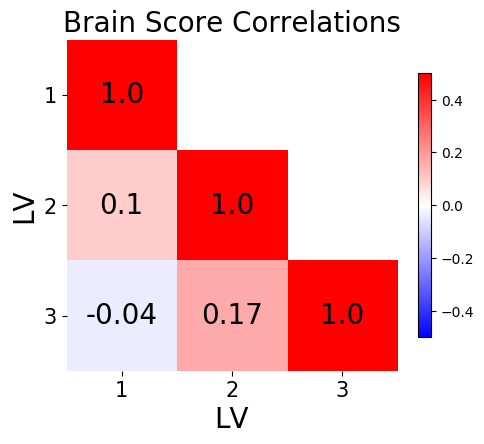

In [10]:
#do same as above but now for brain scores (ie usc data)
usc_corr = np.corrcoef(np.transpose(pls_res['usc'][:,0:3]))
mask =  np.tri(usc_corr.shape[0], k=-1)
usc_corr_lower=np.ma.array(usc_corr, mask=mask).T
np.fill_diagonal(usc_corr_lower,1)

fig, ax = plt.subplots(figsize=(5,5),dpi=100)
im=ax.imshow(usc_corr_lower,cmap='bwr',vmin=-0.5,vmax=0.5)
ax.set_xticks(np.arange(3)); ax.set_yticks(np.arange(3))
ax.set_xticklabels(np.arange(1,4),fontsize=15); ax.set_yticklabels(np.arange(1,4),fontsize=15)
ax.set_xlabel('LV',fontsize=20);ax.set_ylabel('LV',fontsize=20)
fig.colorbar(im,ax=ax,shrink=0.6)
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, np.round(usc_corr_lower[i, j],decimals=2),
                       ha="center", va="center", color="k",fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Brain Score Correlations',fontsize=20)
ax.grid(False)
fig.tight_layout()
plt.show()

In [12]:
def make_lv_grouping(df):
    if df['vsc_LV_1'] >= 0:
        if df['vsc_LV_2'] >= 0:
            group = 'A'
        elif df['vsc_LV_2'] < 0:
            group = 'B'
    elif df['vsc_LV_1'] < 0:
        if df['vsc_LV_2'] >= 0:
            group = 'C'
        elif df['vsc_LV_2'] < 0:
            group = 'D'
    return group

In [13]:
#Now start to look at LV data with demographic and cog info
#concatenate demographic/cog info with Behav scores
vsc_cols = []
for lv in range(1,15):
    vsc_cols.append("vsc_LV_" + str(lv))
df_vsc = pd.DataFrame(data=pls_res['vsc'],columns=vsc_cols)
df_vsc
usc_cols = []
for lv in range(1,15):
    usc_cols.append("usc_LV_" + str(lv))
df_usc = pd.DataFrame(data=pls_res['usc'],columns=usc_cols)
df_usc
df_demo_pls = pd.concat([df_sorted,df_vsc], sort=False,axis=1)
df_demo_pls = pd.concat([df_demo_pls,df_usc], sort=False,axis=1)
df_demo_pls.to_csv('demo_nmfk10_pls_int-slope.csv',index=False)
df_demo_pls

,oxmg_id,bet_qc..0.5.fair..0.bad..blank..good.,Motion_qc,T1_comments_SS,General_comments,FinalVerdict_SSProject_Include.Exclude,SS_IncExc,motion_status_rai,final_status_SS_RP,OX.MRI,...,usc_LV_5,usc_LV_6,usc_LV_7,usc_LV_8,usc_LV_9,usc_LV_10,usc_LV_11,usc_LV_12,usc_LV_13,usc_LV_14
0,1191,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-1.354272,1.257626,-1.652116,0.404904,0.580059,0.179608,0.163676,0.649952,-0.414800,-0.091203
1,1181,NaN,NaN,NaN,NaN,NaN,Include,exclude,exclude,Yes,...,-1.476204,1.755285,0.616611,-5.549115,0.961931,-3.516745,-3.636347,-1.443568,3.226716,-0.171466
2,1066,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,0.770522,2.378378,-2.034679,1.015498,1.850364,-0.835814,-0.143767,0.330586,1.466283,-0.603875
3,1407,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.295185,2.168222,0.180447,-0.770654,0.798770,-1.044776,-1.311053,-0.709046,0.611861,0.584004
4,1300,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.488026,1.229838,1.094601,0.204914,0.790274,1.104086,0.634335,-0.455929,0.793495,0.800460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1124,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.007029,-0.599322,-1.126252,-1.079458,0.360654,-0.679455,3.993460,-1.431919,-1.201483,-2.593634
394,2888,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,0.546097,-0.667794,0.255365,1.552478,-0.034581,-1.453453,-2.146689,-0.587543,0.700108,-1.523136
395,1502,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,0.677538,-1.149727,2.580876,-0.783884,0.582461,1.550423,2.650692,1.667946,-0.328216,-2.096044
396,1224,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-6.944687,-0.009774,3.846126,-4.324034,0.717174,-2.044026,-0.019272,-0.393498,0.940771,-0.053409


In [14]:
df_demo_pls['LV_Group'] = df_demo_pls.apply(make_lv_grouping, axis=1)
df_demo_pls.to_csv('demo_nmfk10_pls_int-slope.csv',index=False)
df_demo_pls

,oxmg_id,bet_qc..0.5.fair..0.bad..blank..good.,Motion_qc,T1_comments_SS,General_comments,FinalVerdict_SSProject_Include.Exclude,SS_IncExc,motion_status_rai,final_status_SS_RP,OX.MRI,...,usc_LV_6,usc_LV_7,usc_LV_8,usc_LV_9,usc_LV_10,usc_LV_11,usc_LV_12,usc_LV_13,usc_LV_14,LV_Group
0,1191,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.257626,-1.652116,0.404904,0.580059,0.179608,0.163676,0.649952,-0.414800,-0.091203,B
1,1181,NaN,NaN,NaN,NaN,NaN,Include,exclude,exclude,Yes,...,1.755285,0.616611,-5.549115,0.961931,-3.516745,-3.636347,-1.443568,3.226716,-0.171466,C
2,1066,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.378378,-2.034679,1.015498,1.850364,-0.835814,-0.143767,0.330586,1.466283,-0.603875,B
3,1407,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.168222,0.180447,-0.770654,0.798770,-1.044776,-1.311053,-0.709046,0.611861,0.584004,D
4,1300,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.229838,1.094601,0.204914,0.790274,1.104086,0.634335,-0.455929,0.793495,0.800460,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1124,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.599322,-1.126252,-1.079458,0.360654,-0.679455,3.993460,-1.431919,-1.201483,-2.593634,A
394,2888,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.667794,0.255365,1.552478,-0.034581,-1.453453,-2.146689,-0.587543,0.700108,-1.523136,D
395,1502,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-1.149727,2.580876,-0.783884,0.582461,1.550423,2.650692,1.667946,-0.328216,-2.096044,A
396,1224,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.009774,3.846126,-4.324034,0.717174,-2.044026,-0.019272,-0.393498,0.940771,-0.053409,C


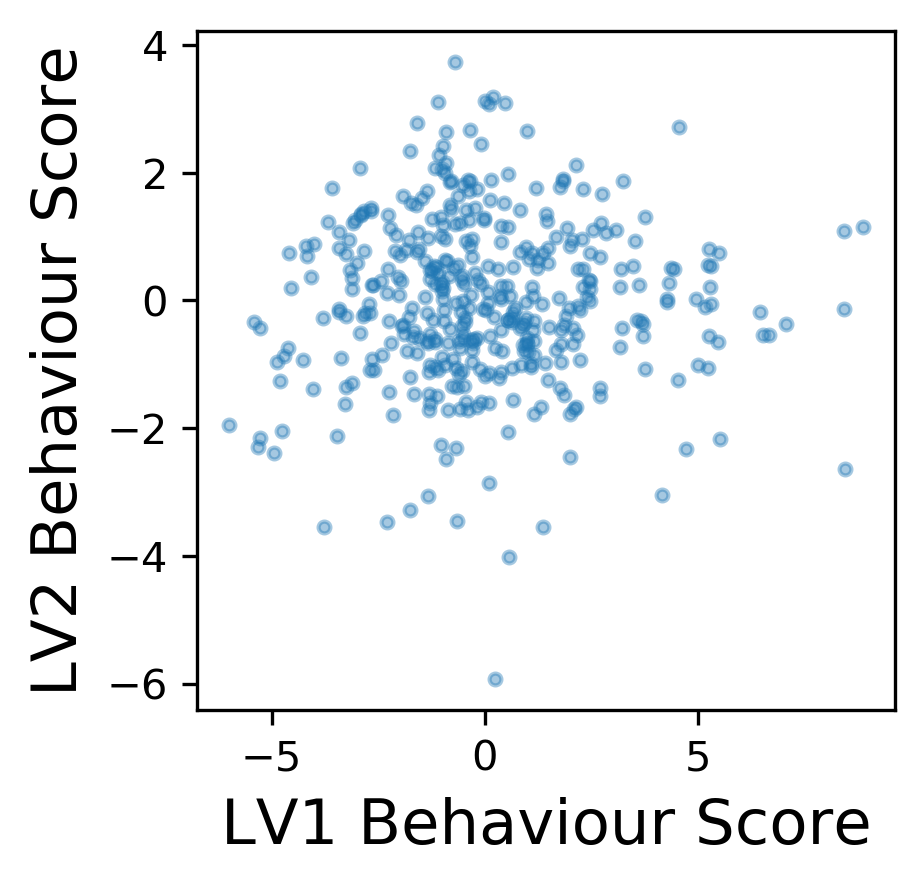

In [15]:
fig, ax = plt.subplots(1,1, figsize = (3,3), dpi=300)
#plt.figure(figsize=(3,3),dpi=100)
x=df_demo_pls['vsc_LV_1'].values.flatten()
y=df_demo_pls['vsc_LV_2'].values.flatten()
lv_group = df_demo_pls['LV_Group'].values.flatten()
age=df_demo_pls['OX.AGE'].values.flatten()
ax.scatter(x,y,s=8,alpha=0.4)
ax.set_xlabel('LV1 Behaviour Score',fontsize=15); ax.set_ylabel('LV2 Behaviour Score',fontsize=15)
plt.show()

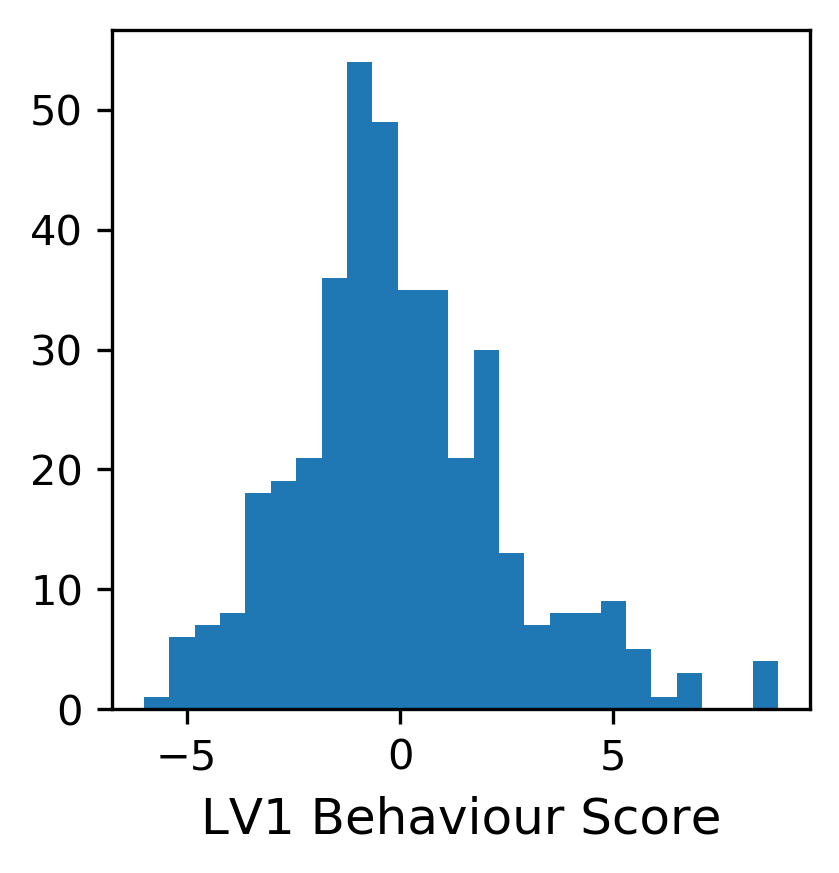

In [16]:
#### LV1 ####
fig, ax = plt.subplots(1,1, figsize = (3,3), dpi=300)
ax.hist(df_demo_pls['vsc_LV_1'].values.flatten(),bins=25)
ax.set_xlabel('LV1 Behaviour Score', fontsize=12)
#plt.title('Histogram of LV1 Behaviour Scores')
plt.savefig("lv1_behavscore_hist.png",bbox_inches='tight', dpi = 'figure')


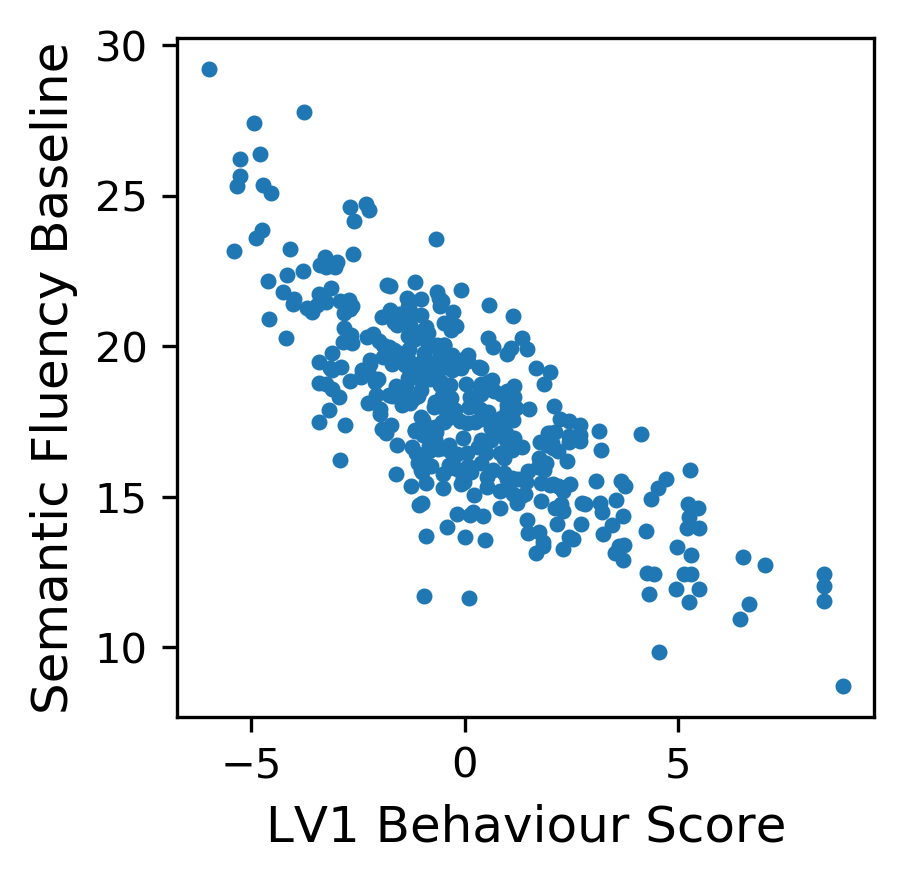

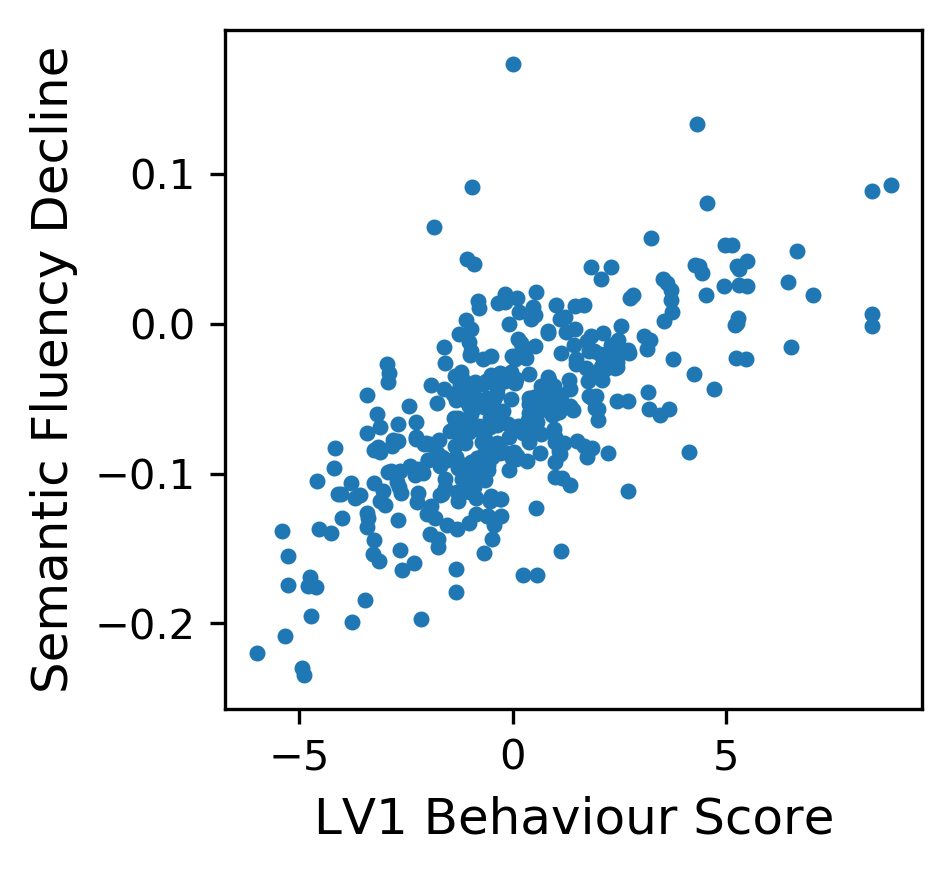

In [18]:
fig, ax = plt.subplots(1,1, figsize = (3,3), dpi=300)
x=df_demo_pls['vsc_LV_1'].values.flatten()
y=df_demo_pls['intercept_animals'].values.flatten()
ax.scatter(x,y,s=8)
ax.set_xlabel('LV1 Behaviour Score',fontsize=12); ax.set_ylabel('Semantic Fluency Baseline',fontsize=12)
plt.savefig("lv1_behavscore_vs_semint.png",bbox_inches='tight', dpi = 'figure')

fig, ax = plt.subplots(1,1, figsize = (3,3), dpi=300)
x=df_demo_pls['vsc_LV_1'].values.flatten()
y=df_demo_pls['time_since_ph5_animals'].values.flatten()
ax.scatter(x,y,s=8)
ax.set_xlabel('LV1 Behaviour Score',fontsize=12); ax.set_ylabel('Semantic Fluency Decline',fontsize=12)
plt.savefig("lv1_behavscore_vs_semslope.png",bbox_inches='tight', dpi = 'figure')